In [3]:
!pip install tensorflow shap

  Using cached tensorflow-2.18.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached shap-0.46.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (24 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.0-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached grpcio-1.68.0-cp39-cp39-macos

In [4]:
!pip install pandas matplotlib seaborn scikit-learn lime 

  Using cached matplotlib-3.9.2-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached lime-0.2.0.1-py3-none-any.whl
  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp39-cp39-macosx_10_9_universal2.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached scikit_image-0.24.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (14 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached imageio-2.36.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached tifffile-2024.8.30-py3-none-any.whl.metadata 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_fscore_support

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LeakyReLU

/Users/tomas/Documents/Applied ML/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [8]:
data_file = "./Epileptic Seizure Recognition.csv"
df = pd.read_csv(data_file)
df_original = df.copy()

Kept the same baseline as Shiqi for the XGBoost.

In [10]:

data_std = df.copy()
data_std.drop('Unnamed', axis=1, inplace=True)
class_relabeling = {1:1, 2:0, 3:0, 4:0, 5:0}
data_std.replace({'y': class_relabeling}, inplace=True)

data_std['stddev'] = data_std.iloc[:, :-1].std(axis=1)
data_std['y'] = data_std['y'].apply(lambda x: 1 if x == 1 else 0)

X = data_std[['stddev']]
y = data_std['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.957391304347826
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1835
           1       0.94      0.84      0.89       465

    accuracy                           0.96      2300
   macro avg       0.95      0.91      0.93      2300
weighted avg       0.96      0.96      0.96      2300



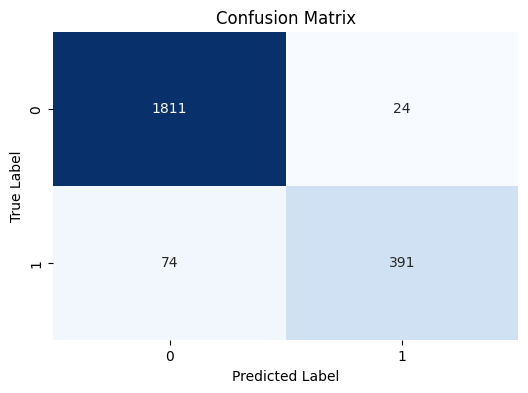

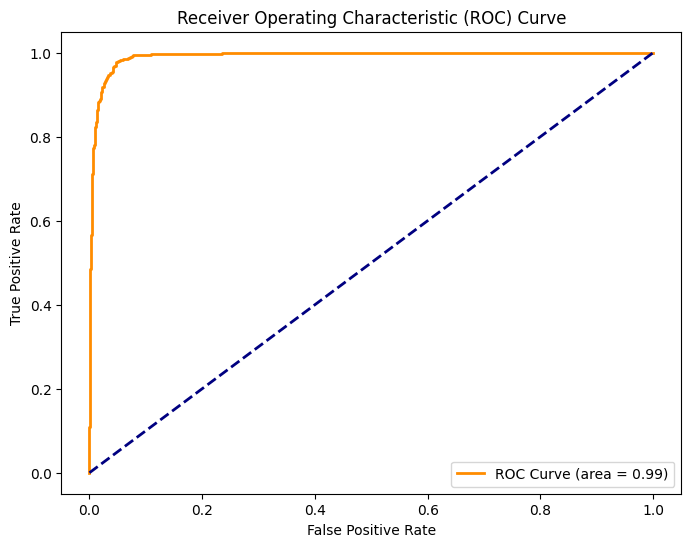

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## **1D-CNN**

In [9]:
df_cnn = df.copy()
df_cnn.drop('Unnamed', axis=1, inplace=True, errors='ignore')

# preprocessing
class_relabeling = {1: 1, 2: 0, 3: 0, 4: 0, 5: 0}
df_cnn.replace({'y': class_relabeling}, inplace=True)
X = df_cnn.drop(columns=['y'])
y = df_cnn['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 1D CNN Model
model = Sequential([
    # First convolutional block
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2, strides=2),
    Dropout(0.2),

    Conv1D(filters=32, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2, strides=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2, strides=2),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2, strides=2),
    Dropout(0.2),

    # Flatten the output
    Flatten(),

    # Fully connected layers
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in cv.split(X_train, y_train):
    X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model.fit(X_cv_train, y_cv_train, epochs=5, batch_size=32, verbose=1, validation_data=(X_cv_val, y_cv_val))

# Evaluate the model
y_prob = model.predict(X_test).flatten()
y_pred = (y_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
auc_roc = roc_auc_score(y_test, y_prob)


Epoch 1/5


/Users/tomas/Documents/Applied ML/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6331 - loss: 2.5603 - val_accuracy: 0.8321 - val_loss: 0.6296
Epoch 2/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8187 - loss: 0.6213 - val_accuracy: 0.9098 - val_loss: 0.5430
Epoch 3/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8460 - loss: 0.5656 - val_accuracy: 0.8424 - val_loss: 0.5148
Epoch 4/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8568 - loss: 0.5106 - val_accuracy: 0.8647 - val_loss: 0.4502
Epoch 5/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8649 - loss: 0.4536 - val_accuracy: 0.9136 - val_loss: 0.3497
Epoch 1/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8656 - loss: 0.3986 - val_accuracy: 0.9196 - val_loss: 0.1613
Epoch 2/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9209 - loss: 0.1887 - val_accuracy: 0.9250 - val_loss: 0.2852
Epoch 3/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9387 - loss: 0.1421 - val_accuracy: 0.9283 - val_loss: 0

Accuracy: 0.98
Precision: 0.97
Recall: 0.95
F1 Score: 0.96
AUC-ROC Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1840
           1       0.97      0.95      0.96       460

    accuracy                           0.98      2300
   macro avg       0.98      0.97      0.98      2300
weighted avg       0.98      0.98      0.98      2300



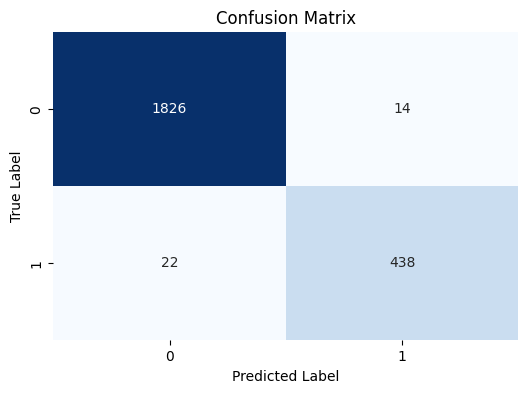

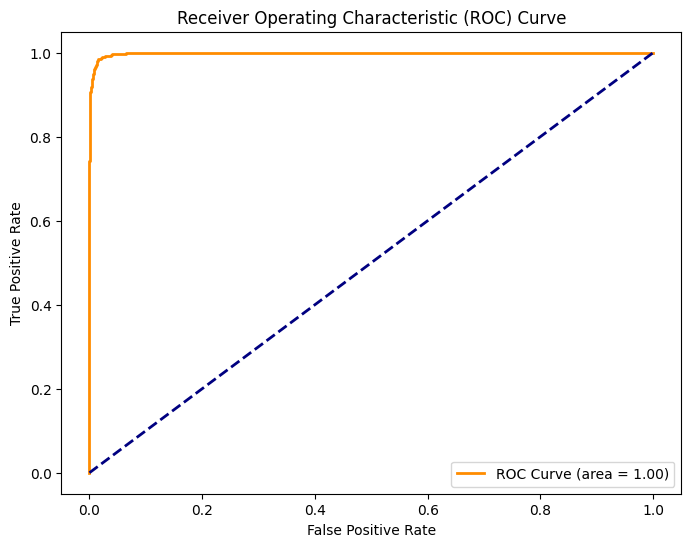

In [12]:
# Metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC Score: {auc_roc:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [13]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Ensure X_train and X_test are NumPy arrays
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy()

# Flatten inputs for LIME
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Feature names (can be replaced with actual feature names if available)
feature_names = [f"Feature {i}" for i in range(X_test_flat.shape[1])]

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_flat, 
    mode='classification', 
    feature_names=feature_names,
    class_names=['Class 0', 'Class 1'],
    discretize_continuous=True,
    random_state=42
)

# Fix model.predict to output probabilities
def predict_proba(inputs):
    inputs = inputs.reshape(inputs.shape[0], X_test.shape[1], 1)  # Reshape to match model input
    probs = model.predict(inputs)
    return np.hstack([1 - probs, probs])  # Return probabilities for both classes (class 0 and class 1)

# Aggregate feature importance
n_samples = 50  # Number of test samples to explain
feature_importance = np.zeros(X_test_flat.shape[1])  # Initialize array to store importance

# Explain each sample and accumulate feature contributions
for idx in range(n_samples):
    explanation = explainer.explain_instance(
        X_test_flat[idx],
        predict_proba,
        num_features=10
    )
    # Accumulate the weights for explained features
    for feature, weight in explanation.local_exp[1]:  # '1' corresponds to Class 1
        feature_importance[feature] += weight

# Average feature importance
feature_importance /= n_samples



157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━

In [14]:
# Format the top 10 features into a DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Average Importance": feature_importance
}).sort_values(by="Average Importance", ascending=False)
importance_df.head(10)

,Feature,Average Importance
138,Feature 138,0.003539
170,Feature 170,0.002362
164,Feature 164,0.001783
160,Feature 160,0.001294
74,Feature 74,0.001210
20,Feature 20,0.001204
38,Feature 38,0.001166
102,Feature 102,0.001142
70,Feature 70,0.001063
114,Feature 114,0.001058


In [15]:
import shap
import numpy as np

# Reshape the test data
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Create a wrapper for model prediction to handle reshaped inputs
def model_predict(data):
    return model.predict(data).flatten()

# Initialize KernelExplainer using a subset of the training data
explainer = shap.KernelExplainer(model_predict, X_train[:100])

# Compute SHAP values for a small subset of the test data (for efficiency)
shap_values = explainer.shap_values(X_test[:50])




/Users/tomas/Documents/Applied ML/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


  2%|▏         | 1/50 [00:18<14:42, 18.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


  4%|▍         | 2/50 [00:33<13:06, 16.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


  6%|▌         | 3/50 [00:45<11:23, 14.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


  8%|▊         | 4/50 [00:58<10:39, 13.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 10%|█         | 5/50 [01:11<10:04, 13.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 12%|█▏        | 6/50 [01:23<09:41, 13.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 14%|█▍        | 7/50 [01:37<09:32, 13.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 16%|█▌        | 8/50 [01:50<09:15, 13.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 18%|█▊        | 9/50 [02:02<08:51, 12.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 20%|██        | 10/50 [02:15<08:33, 12.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 22%|██▏       | 11/50 [02:27<08:16, 12.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 24%|██▍       | 12/50 [02:41<08:13, 12.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 26%|██▌       | 13/50 [02:53<07:49, 12.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 28%|██▊       | 14/50 [03:05<07:30, 12.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 30%|███       | 15/50 [03:18<07:23, 12.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 32%|███▏      | 16/50 [03:30<07:02, 12.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 34%|███▍      | 17/50 [03:43<06:51, 12.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 36%|███▌      | 18/50 [03:55<06:35, 12.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 38%|███▊      | 19/50 [04:07<06:19, 12.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 40%|████      | 20/50 [04:19<06:06, 12.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 42%|████▏     | 21/50 [04:31<05:54, 12.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 44%|████▍     | 22/50 [04:44<05:45, 12.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 46%|████▌     | 23/50 [04:56<05:36, 12.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 48%|████▊     | 24/50 [05:08<05:20, 12.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 50%|█████     | 25/50 [05:21<05:10, 12.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 52%|█████▏    | 26/50 [05:33<04:57, 12.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 54%|█████▍    | 27/50 [05:46<04:44, 12.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 56%|█████▌    | 28/50 [05:58<04:33, 12.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 58%|█████▊    | 29/50 [06:11<04:20, 12.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 60%|██████    | 30/50 [06:24<04:14, 12.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 62%|██████▏   | 31/50 [06:36<03:58, 12.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 64%|██████▍   | 32/50 [06:48<03:44, 12.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 66%|██████▌   | 33/50 [07:01<03:30, 12.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 68%|██████▊   | 34/50 [07:13<03:19, 12.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 70%|███████   | 35/50 [07:26<03:09, 12.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 72%|███████▏  | 36/50 [07:39<02:58, 12.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


 74%|███████▍  | 37/50 [07:57<03:02, 14.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 76%|███████▌  | 38/50 [08:11<02:51, 14.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 78%|███████▊  | 39/50 [08:26<02:38, 14.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 80%|████████  | 40/50 [08:40<02:23, 14.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


 82%|████████▏ | 41/50 [08:56<02:11, 14.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 84%|████████▍ | 42/50 [09:10<01:55, 14.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


 86%|████████▌ | 43/50 [09:25<01:43, 14.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 88%|████████▊ | 44/50 [09:40<01:27, 14.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 90%|█████████ | 45/50 [09:54<01:13, 14.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 92%|█████████▏| 46/50 [10:09<00:58, 14.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 94%|█████████▍| 47/50 [10:23<00:43, 14.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 96%|█████████▌| 48/50 [10:36<00:28, 14.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


 98%|█████████▊| 49/50 [10:49<00:13, 13.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
7513/7513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


100%|██████████| 50/50 [11:02<00:00, 13.25s/it]


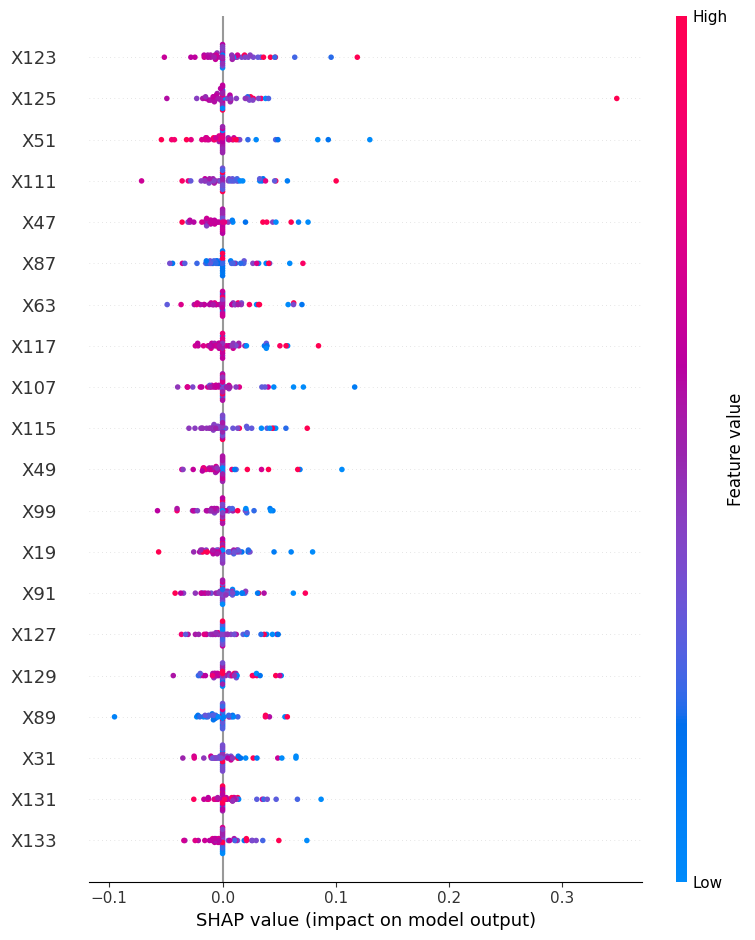

In [16]:
# Plot summary of SHAP values
shap.summary_plot(shap_values, X_test[:50], feature_names=X.columns)

In [ ]:
# Architecture derived from Acharya paper if you want to analyze more
# Comments:
# Droupout layers were inherited from Acharya paper
# Pooling layers were also inherited from Acharya paper
# Dataset is relatively small so number of convlutional layers were reduced. Also, we doing binary classification as oppposed to multi-class classification
# MaxPooling layers are standard in CNNs based on the literature. In this case, these layers were inhertited identically from the Acharya paper.
# The number of filters in the convolutional layers were reduced to 64 and 128. This is because the dataset is relatively small and the number of classes is reduced to 2.
# Note on the number of filters and the kernel size: the number of filters were increased to increase depth per convolutional block, since have less blocks. 
# The number at 64 and 128 is relatively arbitrary. The large icrease compared to the Acharya paper allows all the channels to contribute to the pattern recognition while still keeping the block nuber at 2
# The kernel size was decreased to 3 to adapt to the high filter count.

# model = Sequential([
#     # First convolutional block
#     Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
#     MaxPooling1D(pool_size=2, strides=2),
#     Dropout(0.3),

#     # Second convolutional block
#     Conv1D(filters=128, kernel_size=3, activation='relu'),
#     MaxPooling1D(pool_size=2, strides=2),
#     Dropout(0.4),

#     # Flatten the output
#     Flatten(),

#     # Fully connected layers
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid') 
# ])